For k =  5  fold cross validation, the average L2 error is:
24.396451458705865
Error for each K: 
[26.87064636218872, 21.11139359889382, 33.08558165134586, 22.096178504441507, 18.81845717665942]


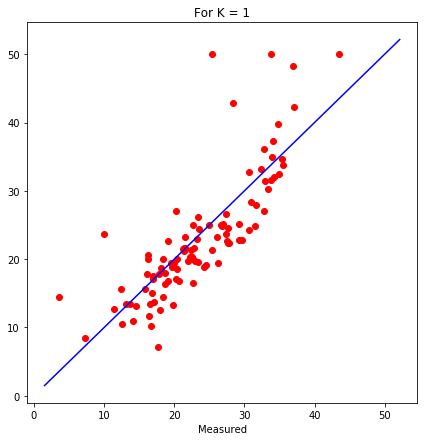

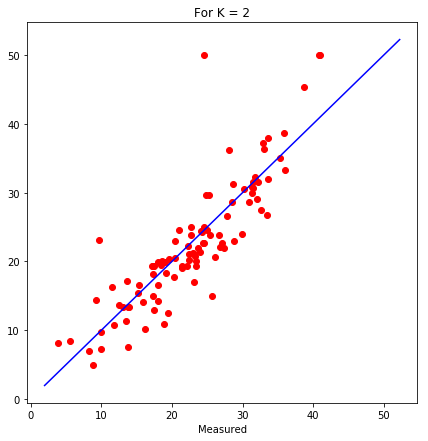

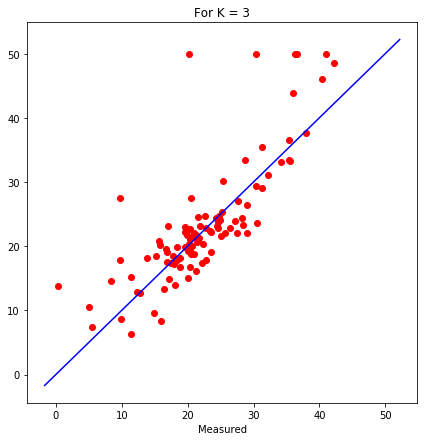

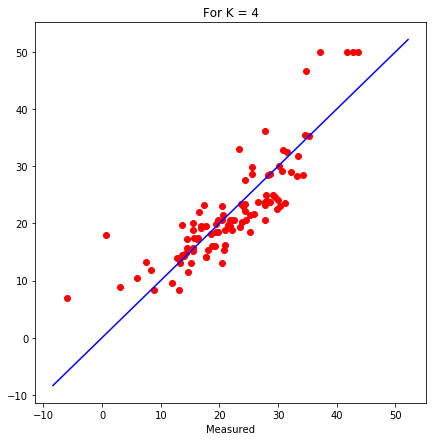

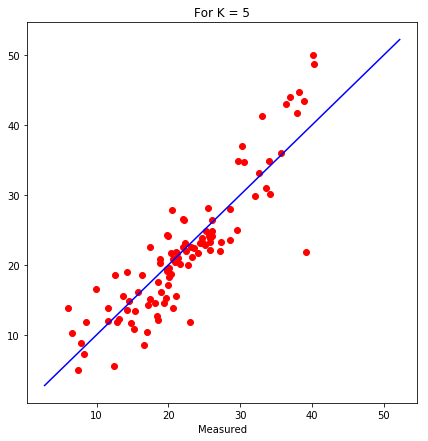

In [2]:

from sklearn.datasets import load_boston
import numpy as np
import random
import matplotlib.pyplot as plt
import math

data, target = load_boston(return_X_y=True)



def leastSquares(x, y, ifRidge, lamb = 0): 
    y = y.reshape((len(x),1))
    B = np.matmul(x.T,x)
    if ifRidge:
        B = B + np.eye(len(B))*lamb
    B = np.linalg.inv(B)
    
    B = np.matmul(B, x.T)
    B = np.matmul(B, y)
    
    return B

def shuff(data, target):
    target = target.reshape((len(target),1))
    combo = np.concatenate((data,target),axis=1)
    np.random.shuffle(combo)
    data = combo.T[0:13].T
    target = combo[:,13]
    
    return data, target

def kFold(k, data, target, ridge = False, lamb = 0, graph = True):
    target = target.reshape((len(target),1))
    data = np.concatenate((data,np.ones((data.shape[0],1))),axis=1)
    
    error = []

    for i in range(k):
        if(i == 4):
            ind1 = int(len(data)-math.ceil(len(data)/k))
            ind2 = int(len(data))

        else:
            ind1 = int((i*len(data)/k))
            ind2 = int(ind1+len(data)/k)

        
        testData = data[ind1:ind2]
        testTarget = target[ind1:ind2]
        trainingData = np.concatenate((data[0:ind1],data[ind2:506]))
        trainingTarget = np.concatenate((target[0:ind1],target[ind2:506]))

        B = leastSquares(trainingData,trainingTarget, ridge, lamb)
        predictedY = np.matmul(testData, B)
        testTarget = testTarget.reshape((predictedY.shape[0],1))
        diff = np.linalg.norm(predictedY-testTarget,2)
        error.append((diff**2)/len(predictedY))

        if graph:
            fig, ax = plt.subplots(1,1,figsize = (7,7))
            ax.plot(predictedY[:,0], testTarget[:], 'ro')
            lower = min(plt.ylim()[0], plt.xlim()[0])
            upper = max(plt.ylim()[1], plt.xlim()[1])
            ax.plot([lower, upper],[lower,upper], 'b-')
            ax.set_title('For K = ' + str(i+1))
            ax.set_xlabel('Predicted')
            ax.set_xlabel('Measured')
    
    return error
            
K = 5
data, target = shuff(data,target)
errorList = kFold(K,data,target, graph = True)
print('For k = ', K, ' fold cross validation, the average L2 error is:')
print(sum(errorList)/float(len(errorList)))
print('Error for each K: ')
print(errorList)


The average error across the 5-fold classification was found to be around 24.4. Through running through the program multiple times, the average error changes slightly but not by much. 

In [4]:
er = []
for i in range(1000):
    data, target = shuff(data,target)
    errorList = kFold(K,data,target, graph = False)
    er.append(sum(errorList)/float(len(errorList)))

print('Mean: ', np.mean(er), ' Standard Deviation: ', np.std(er))

Mean:  23.939292610612117  Standard Deviation:  0.5404008588485627


After 1000 runs, the Average error was found to be approximately 23.94 with shuffling the data between each run.

In [5]:
bestL = 0
bestErr = 500
errList = []
data, target = shuff(data,target)
for l in np.arange(0,50,.001):
    K = 5
    errorList = kFold(K,data,target, ridge = True, lamb = l, graph = False)
    avgErr = sum(errorList)/float(len(errorList))
    if avgErr < bestErr:
        bestL = l
        bestErr=  avgErr
        errList = errorList
    
print(r'Best lambda ' + str(bestL) + ' with error ' + str(bestErr))
print('Error for each K:')
print(errList)

Best lambda 0.042 with error 23.39698907506689
Error for each K:
[21.317123454894247, 36.87894963008931, 15.149952150807945, 26.01880844009944, 17.62011169944351]


Attempting the above run for higher values of $\lambda$.

In [8]:
bestL = 0
bestErr = 500
errList = []
data, target = shuff(data,target)
for l in np.arange(50,10000, 10):
    K = 5
    errorList = kFold(K,data,target, ridge = True, lamb = l, graph = False)
    avgErr = sum(errorList)/float(len(errorList))
    if avgErr < bestErr:
        bestL = l
        bestErr=  avgErr
        errList = errorList
    
print(r'Best lambda ' + str(bestL) + ' with error ' + str(bestErr))
print('Error for each K:')
print(errList)

Best lambda 50 with error 26.637488990385663
Error for each K:
[37.73387538770429, 32.925308122398555, 30.024765166346018, 18.843228460516336, 13.660267814963102]


Since the error is higher for higher values of $\lambda$, the best lambda was from the previous run with $\lambda = .042$